Four Classes Rotating with Expansion V1. Bidimensional.
100 batches of 1187 instances



METHOD: Static lp as classifier
Execution time:  3.829418859558155
Average micro-F1: 0.20739999999999995
Average Accuracy:  21.8586
Standard Deviation:  35.3386262048
Variance:  1248.81850204


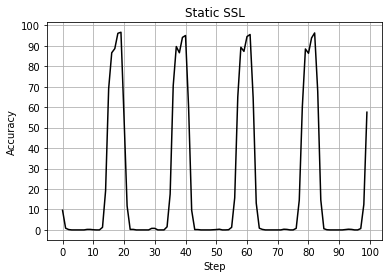

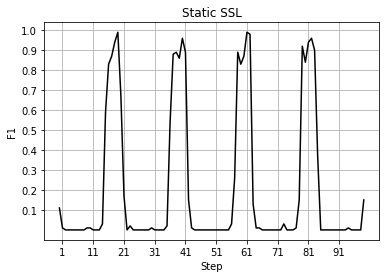




METHOD: Sliding lp as classifier
Execution time:  3.186769999134814
Average micro-F1: 0.18040000000000003
Average Accuracy:  18.7117
Standard Deviation:  21.9949948422
Variance:  483.77979811


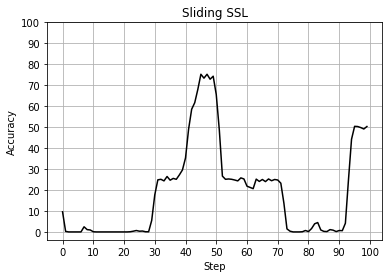

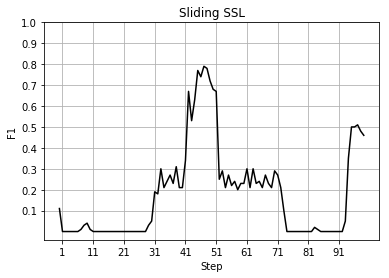




METHOD: Incremental lp as classifier
Execution time:  114.82541292888446
Average micro-F1: 0.19970000000000002
Average Accuracy:  20.5622
Standard Deviation:  34.6299356217
Variance:  1199.23244116


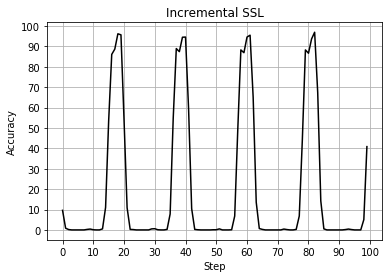

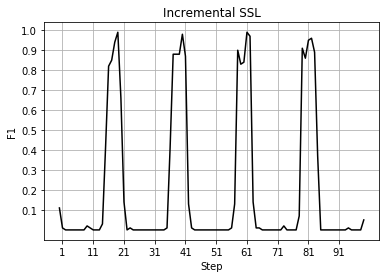




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  15.978138048163615
Average micro-F1: 0.26709999999999995
Average Accuracy:  26.5014
Standard Deviation:  31.2423050372
Variance:  976.08162404


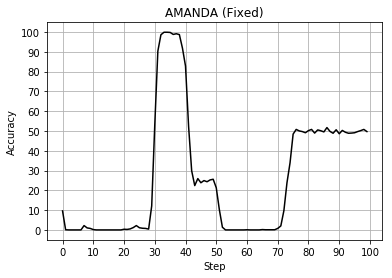

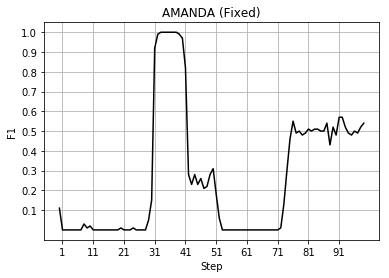




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  17.405721369743844
Average micro-F1: 0.2651
Average Accuracy:  26.7227
Standard Deviation:  25.3957974419
Variance:  644.94652771


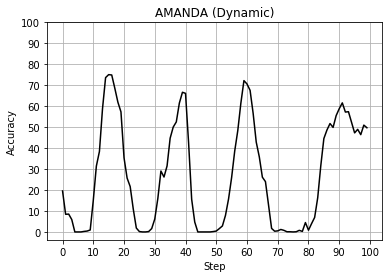

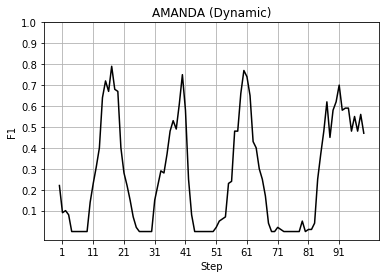




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  88.99124423653637
Average micro-F1: 0.20350000000000001
Average Accuracy:  20.4521
Standard Deviation:  37.07577207
Variance:  1374.61287459


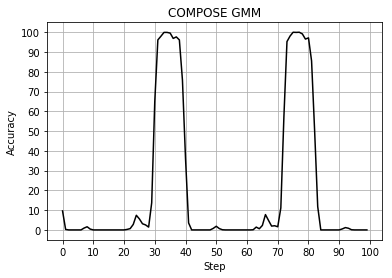

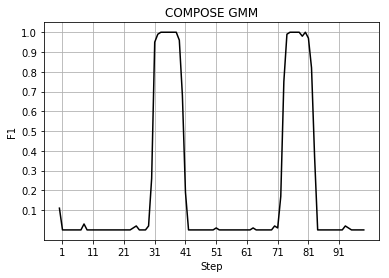




Method: Level IW
Execution time:  88.99124423653637
Average micro-F1: 0.24860000000000004
Average Accuracy:  21.002526
Standard Deviation:  38.2535126936
Variance:  1463.3312334


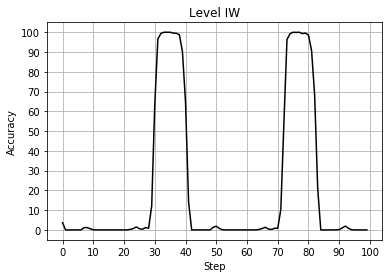

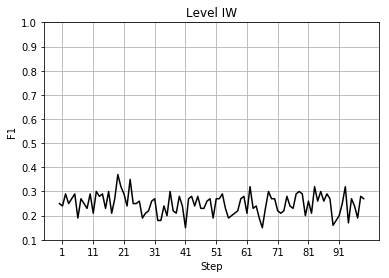

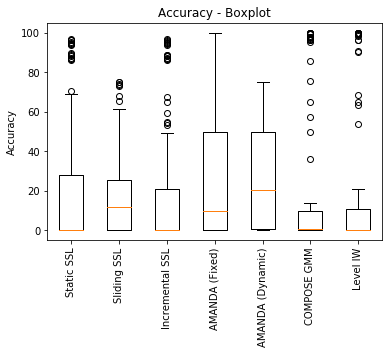

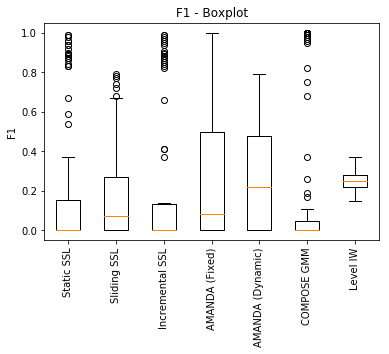

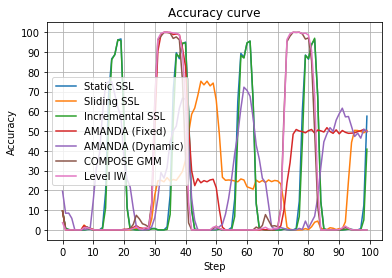

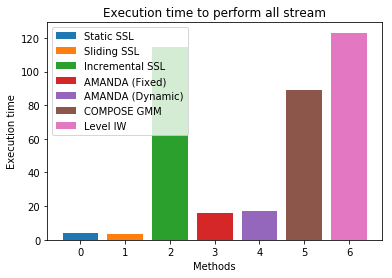

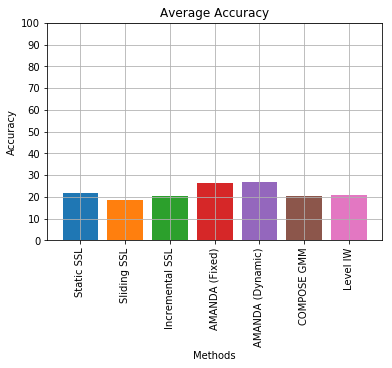

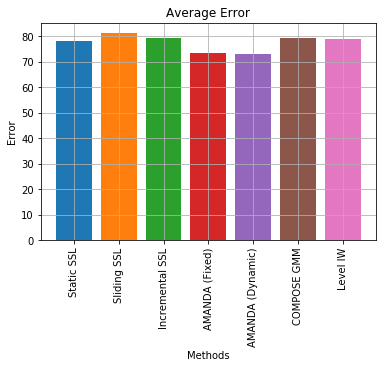

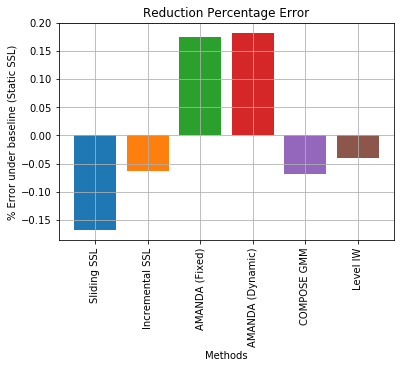

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CRE_V1(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 9, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 9, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 9, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 9, 0.65, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 4, None, "kde", 'knn')

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 9)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CRE-V1', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()